<a href="https://colab.research.google.com/github/cecilylynn/data-science-projects/blob/main/Data_Collection_THTHS05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Collection: "Too Hot To Handle" Season 5

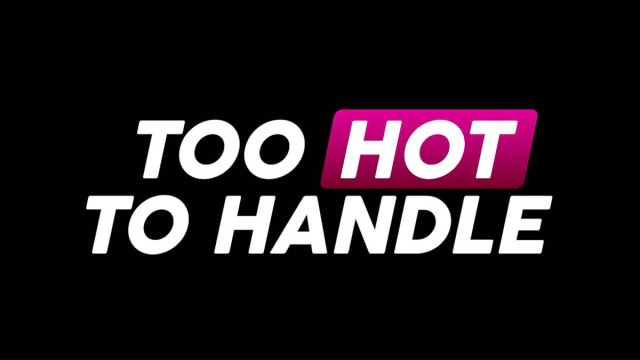

##The Project

"Too Hot To Handle" (THTH) is a Netflix reality dating show in which hot singles are living together but are not allowed to have any sexual contact. The Season 5 release date and time is July 14, 2023 at 3:01 am EDT. At that time, the first four episodes will be released, with four more on July 21 and the last four on July 28.

The aim of this project is to perform time series analysis on the contestants follower counts to see how episode releases affect the metric. Side goals include comparing data between contestants and looking for correlations between factors relating to contestants' behavior on screen and their follower counts. A stretch goal is to identify which features have the biggest influence on follower growth and implement these features into a predictive model.

Analysis of this type is useful for influencers, reality tv stars, and media/entertainment companies in order to better understand how to effectively increase social media engagement.

This notebook is one part of this larger project. Here, we collect the data that will be used in the larger project.



##Data Collection Approach

The purpose of this notebook is to collect data on the THTH S05 contestants to use in the broader data analysis project on the contestants Instagram follower counts.

We will begin by scraping a website to get contestants' basic info such as name, age, sex, occupation, and, of course, Instagram handle. This will be stored as a pandas dataframe. One thing to note is that prior to the release of the show, only the intial 10 contestants are known, but throughout the season new contestants, referred to as "Grenades," are added. So, the scraper will handle the first 10 contestants, and Grenades will be added by hand later.

Next, we need to collect the number of Instagram followers for each contestant. A challenge here is that it's prohibitively difficult to scrape data from Instagram in Python. However, using the browser's built-in developer tools, we can access the HTML on any instagram page and find the exact follower count by identifying the correct HTML tag. Since there are only 10 contestants, this is a manageable solution.

Follower counts will be collected and added to the dataframe once on July 13, twenty-four hours before the release of the first batch of episodes. Then for each batch of episodes, counts will be collected each hour for the first 24 hours after release, and then once a day for the following week. Collection is expected to cease a week after the release of the final batch, however, data collection may be continued beyond this if there's an interesting reason to do so.

Additionally, notes on the contestants' on-screen behavior will be added for each batch of episodes.

## Gathering Pre-Air Contestant Info

We want to create a pandas dataframe with the basic info on the contestants before the first batch of episodes drops.

The features we're interested in are:

*   First & Last Name
*   Age, Sex, Location
* Instagram URL and handle
* Occupation
* Number of Instagram followers 24 hours prior to release of the first batch of episodes (Baseline Followers)

The number of contestants is small, so this could be done by hand, however using a data scraper will reduce the likelihood of human error (and the likelihood of losing our minds with boredom). We can build a scraper to get the basic info from Radio Times. However, this source is missing 'Last Name' and 'Sex', and of course 'Baseline Followers.' These will be added manually.

There's also the challenge of getting the 'Baseline Followers.' We have to manually go into the HTML for each contestant's Instagram, find the number of followers, and record it by hand. This must be done at the time that we're interested in.

Additionally, we will find and save the hex codes for the #thth theme colors so that we can use them later for our visualizations. We'll get these by uploading pictures from the @toohotnetflix Instagram account to https://imagecolorpicker.com/en

In [1]:
#used for scraping and saving data
import pandas as pd
import requests
from bs4 import BeautifulSoup

#used for exporting CSV
from google.colab import drive
from google.colab import files

In [2]:
#We want to save the hex codes for thth as a dictionary so we can use them as the palette for our visualizations throughout this project.
#These were obtained by uploading pictures from the @toohotnetflix Instagram account to https://imagecolorpicker.com/en

thth_palette = {'magenta': '#fb04cb',
                'green': '#89ef1c',
                'purple':'#9412f2',
                'aqua': '#04fbfb',
                'blue': '#5101f8',
                'white': '#FFFFFF'}

In [3]:
#using requests and beautifulsoup to get the page text

URL = "https://www.radiotimes.com/tv/entertainment/reality-tv/too-hot-to-handle-season-5-cast-line-up/"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")

page_text = soup.find(class_="editor-content mb-lg hidden-print js-piano-locked-content")

In [4]:
#Getting the contestant names

#getting bs4 resultset of all the names using the fact that each name appears wrapped in an "h2" tag
names = page_text.find_all("h2")

#doing a bit of cleaning, because the title also had an h2 tag
names.remove(names[0])

#saving the first names to a list
first_names = []

for name in names:
  first_names.append(name.text.strip())

#manually creating the list of last names
last_names = ['Woodard',
              'Francis',
              'Snell',
              'Obanor',
              'Randolph',
              'Hutchinson',
              'Brooke',
              'LoNigro',
              'Russell',
              'Thompson']

#manually creating the list for sex
sex = ['M','M','M', 'F','F','F','F','M','M', 'F']

In [5]:
#using the <a> tag to grab all the instagram links
links = page_text.find_all("a")

insta_urls=[]
insta_handles=[]

for link in links:
  if 'instagram' in link['href']:
    insta_urls.append(link['href'])
    insta_handles.append(link.text)

In [6]:
#all the other info, using the <p> tag

paragraphs = page_text.find_all("p")

In [7]:
age=[]
home=[]
occupation=[]

for paragraph in paragraphs:
  if 'Age: ' in paragraph.text:
    age.append(paragraph.text.split(':', 1)[1].strip())
  elif 'From: ' in paragraph.text:
    home.append(paragraph.text.split(':', 1)[1].strip())
  elif 'Job: ' in paragraph.text:
    occupation.append(paragraph.text.split(':', 1)[1].strip())

In [8]:
#scraped by hand from Instagram at 3:00 AM EST on July 13, 2023

baseline = [4448,
25441,
18373,
34430,
110974,
19583,
302786,
19198,
62483,
15429]

In [9]:
#put it all together in a pd df

singles_df=pd.DataFrame({'First_Name': first_names,
                         'Last_Name': last_names,
                         'Sex': sex,
                         'Insta_URLs': insta_urls,
                         'Insta_Handles': insta_handles,
                         'Age':age,
                         'Sex': sex,
                         'Home':home,
                         'Occupation': occupation,
                         'Baseline':baseline})

In [10]:
singles_df

,First_Name,Last_Name,Sex,Insta_URLs,Insta_Handles,Age,Home,Occupation,Baseline
0,Dre,Woodard,M,https://www.instagram.com/drewoodard/?hl=en,@drewoodard,23,"Atlanta, USA",Graduate,4448
1,Isaac,Francis,M,https://www.instagram.com/isaacfranciss/?hl=en,@isaacfranciss,24,"New Jersey, USA",Model and banker,25441
2,Alex,Snell,M,https://www.instagram.com/alexsnelll/?hl=en,@alexsnelll,28,"London, UK",Personal trainer,18373
3,Christine,Obanor,F,https://www.instagram.com/christineobanor/?hl=en,@christineobanor,26,"Texas, USA",Model,34430
4,Courtney,Randolph,F,https://www.instagram.com/courtneykrandolph/?h...,@courtneykrandolph,25,"Houston, USA",Real estate agent,110974
5,Elys,Hutchinson,F,https://www.instagram.com/elys_hutchinson/?hl=en,@elys_hutchinson,23,Switzerland,Model,19583
6,Hannah,Brooke,F,https://www.instagram.com/hannahbrooke/?hl=en,@hannahbrooke,24,"LA, USA",Artist,302786
7,Hunter,LoNigro,M,https://www.instagram.com/hunting_for_lonigro/...,@hunting_for_lonigro,24,"Arizona, USA",Influencer,19198
8,Louis,Russell,M,https://www.instagram.com/louis_russell/?hl=en,@louis_russell,22,"Hampshire, UK",Model,62483
9,Megan,Thompson,F,https://www.instagram.com/meganthomsn/?hl=en,@meganthomsn,26,"Cambridge, UK",Personal assistant,15429


And we want to export the data as a CSV so we can easily read it in to to other notebooks where we'll do the analysis.

In [11]:
#saving it in my Google Drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Python/THTH Season 5/thth_s05_singles.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  singles_df.to_csv(f)

#and downloading as a CSV
singles_df.to_csv('thth_s05_singles.csv', encoding = 'utf-8-sig')
files.download('thth_s05_singles.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 24 Hour Data From Initial Episode Drop

The first four episodes were released at 3:01 am on July 14, 2023. Data for each of the initial ten contestants was collected hourly from 2 am on July 14 until 2 am on July 15. We will store this data as a dataframe where each column is a time series for the specified contestant. Additionally, data was collected for the show's Instagram, @toohotnetflix. This will be stored as the final column. Once the dataframe is assembled, it will be exported as a CSV to Google Drive and as a download.

In [20]:
#hours since July 14 2am
time = [t for t in range(25)]

#number of followers for each contestant
dre = [4473,	4475,	4491,	4516,	4529,	4546,	4559,	4575,	4604,	4628,	4651,	4671,	4693,	4728,	4760,	4790,	4828,	4861,	4898,	4943,	4982,	4997,	5020,	5049,	5077]
isaac = [25470,	25471,	25502,	25551,	25607,	25667,	25746,	25823,	25912,	26020,	26111,	26212,	26333,	26471,	26605,	26727,	26879,	26982,	27090,	27221,	27313,	27424,	27502,	27578,	27660]
alex = [18376, 18379, 18391, 18411, 18422, 18441, 18466, 18483, 18516, 18546, 18575, 18598, 18622, 18654, 18686, 18708, 18753, 18785, 18813, 18847, 18879, 18911, 18937, 18960, 18992]
christine = [34455, 34457, 34481, 34528, 34582, 34629, 34704, 34783, 34880, 34984, 35101, 35202, 35337, 35462, 35609, 35755, 35928, 36077, 36239, 36391, 36494, 36635, 36739, 36847, 36943]
courtney = [111090, 111100, 111125, 111162, 111193, 111246, 111284, 111334, 111380, 111454, 111512, 111583, 111684, 111755, 111839, 111937, 112025, 112098, 112189, 112269, 112328, 112420, 112473, 112535, 112596]
elys = [19631, 19633, 19680, 19761, 19867, 19991, 20119, 20265, 20439, 20626, 20811, 21000, 21193, 21410, 21670, 21916, 22168, 22379, 22588, 22814, 22987, 23155, 23311, 23456, 23617]
hannah = [302740, 302737, 302781, 302832, 302899, 302975, 303059, 303142, 303244, 303366, 303482, 303596, 303694, 303827, 303974, 304106, 304225, 304365, 304519, 304687, 304822, 304954, 305081, 305177, 305289]
hunter = [19204, 19205, 19211, 19222, 19229, 19238, 19248, 19259, 19272, 19290, 19306, 19315, 19328, 19346, 19362, 19383, 19401, 19410, 19420, 19441, 19458, 19474, 19487, 19500, 19513]
louis = [62520, 62527, 62567, 62651, 62765, 62910, 63021, 63184, 63389, 63613, 63874, 64086, 64340, 64588, 64873, 65148, 65428, 65715, 65978, 66236, 66428, 66630, 66794, 66944, 67092]
megan = [15459, 15462, 15495, 15540, 15586, 15629, 15690, 15761, 15815, 15897, 15969, 16041, 16127, 16216, 16319, 16429, 16528, 16631, 16721, 16816, 16896, 16958, 17014, 17076, 17144]
toohotnetflix = [654723, 654734, 654671, 654650, 654644, 654644, 654661, 654673, 654680, 654709, 654733, 654778, 654849, 654885, 654936, 654987, 655051, 655096, 655169, 655215, 655253, 655330, 655377, 655409, 655444]

#structure it into a dataframe
first_24_hours_df = pd.DataFrame({'Time': time,
                         'Dre': dre,
                         'Isaac': isaac,
                         'Alex': alex,
                         'Christine': christine,
                         'Courtney': courtney,
                         'Elys': elys,
                         'Hannah': hannah,
                         'Hunter': hunter,
                         'Louis': louis,
                         'Megan': megan,
                         'Too Hot' : toohotnetflix})

In [21]:
first_24_hours_df.set_index('Time', inplace = True)

first_24_hours_df.head()

,Dre,Isaac,Alex,Christine,Courtney,Elys,Hannah,Hunter,Louis,Megan,Too Hot
Time,,,,,,,,,,,
0,4473,25470,18376,34455,111090,19631,302740,19204,62520,15459,654723
1,4475,25471,18379,34457,111100,19633,302737,19205,62527,15462,654734
2,4491,25502,18391,34481,111125,19680,302781,19211,62567,15495,654671
3,4516,25551,18411,34528,111162,19761,302832,19222,62651,15540,654650
4,4529,25607,18422,34582,111193,19867,302899,19229,62765,15586,654644


In [17]:
#saving it in my Google Drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Python/THTH Season 5/follower_counts_first_24_hours.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  first_24_hours_df.to_csv(f)

#and downloading as a CSV
singles_df.to_csv('follower_counts_first_24_hours.csv', encoding = 'utf-8-sig')
files.download('follower_counts_first_24_hours.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>